In [37]:
from tsai.all import *
from datetime import timedelta

In [38]:
files = glob.glob('model input CSVs/*.csv')
files.remove('model input CSVs\\input All.csv')
files

['model input CSVs\\input Forest Road.csv',
 'model input CSVs\\input Maple Drive East.csv',
 'model input CSVs\\input YMCA.csv']

In [39]:
def normalize(df):
    result = df.copy()
    max_value = df['P_gen [kW]'].max()
    min_value = df['P_gen [kW]'].min()
    result['P_gen [kW]'] = (df['P_gen [kW]'] - min_value) / (max_value - min_value)
    return result

In [40]:
glb = pd.DataFrame()
dfs = list()
unique_id = -1
format = '%Y-%m-%d %H:%M:%S'
time_min = timedelta(days=25)
time_step = timedelta(days=0, hours=1)
for f, file in enumerate(files):
    df = pd.read_csv(file, delimiter=';')
    df = df.fillna(method='pad', limit=3)
    rows = df.shape[0]
    drop_id = np.where(df.isna())[0]

    df = df.drop(drop_id)
    df.reset_index(drop=True, inplace=True)

    rows = len(df.index)
    
    unique_ids = np.zeros((rows))
    unique_id +=1 
    unique_ids[0] = unique_id
    for i in range(rows-1):
        time_start = datetime.strptime(df['Time'][i], format)
        time_end = datetime.strptime(df['Time'][i+1], format)
        time_delta = time_end-time_start
        if time_delta > time_step:
            unique_id += 1
        unique_ids[i+1] = unique_id
    
    df['unique_id'] = unique_ids
    delete_ids = list()
    for i in range(int(unique_ids.min()), int(unique_ids.max()+1)):
        ind = df.index[df['unique_id'] == i].tolist()
        time_start = datetime.strptime(df['Time'][ind[0]], format)
        time_end = datetime.strptime(df['Time'][ind[-1]], format)
        time_delta = time_end-time_start
        if time_delta < time_min:
            delete_ids.extend(ind)

    print(f'--DataFrame {f}: {file}')
    print(f'\tall: {len(df.index)}')
    df = df.drop(delete_ids)
    print(f'\tfew: {len(df.index)}')
    ids = df['unique_id'].unique()
    print(f'\tids:{ids}\n')

    df = normalize(df)
    dfs.append(df)
    glb = pd.concat([glb, df])

--DataFrame 0: model input CSVs\input Forest Road.csv
	all: 5730
	few: 2277
	ids:[11. 13.]

--DataFrame 1: model input CSVs\input Maple Drive East.csv
	all: 6798
	few: 1971
	ids:[17. 19. 22.]

--DataFrame 2: model input CSVs\input YMCA.csv
	all: 7508
	few: 5219
	ids:[153. 154. 161. 162.]



In [41]:
path=Path("model input CSVs")
glb.to_csv(path / 'input All.csv',sep=";",index=False)

unique_id
11.0     AxesSubplot(0.125,0.125;0.775x0.755)
13.0     AxesSubplot(0.125,0.125;0.775x0.755)
17.0     AxesSubplot(0.125,0.125;0.775x0.755)
19.0     AxesSubplot(0.125,0.125;0.775x0.755)
22.0     AxesSubplot(0.125,0.125;0.775x0.755)
153.0    AxesSubplot(0.125,0.125;0.775x0.755)
154.0    AxesSubplot(0.125,0.125;0.775x0.755)
161.0    AxesSubplot(0.125,0.125;0.775x0.755)
162.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

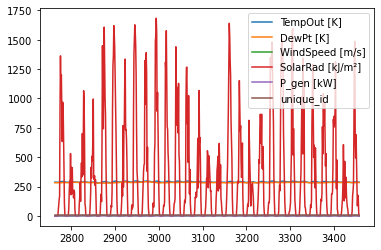

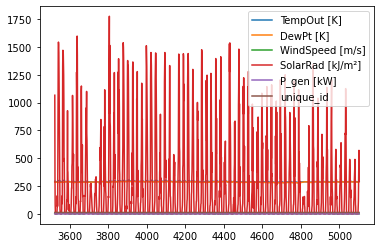

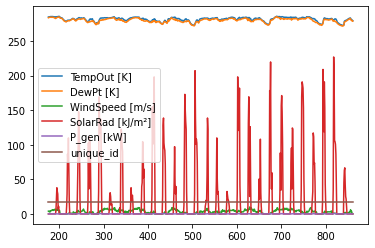

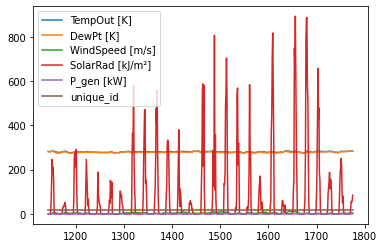

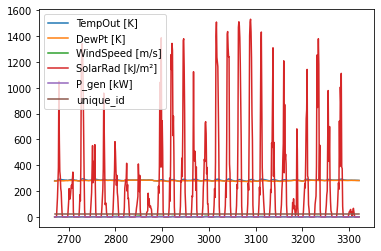

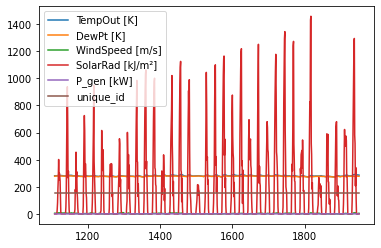

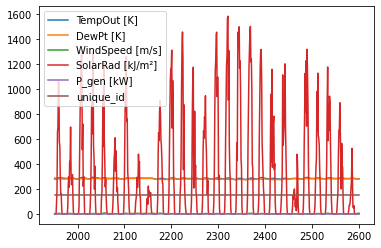

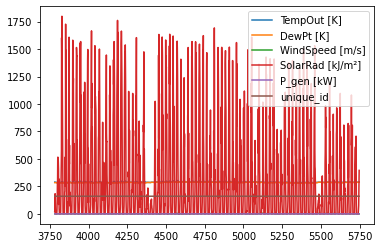

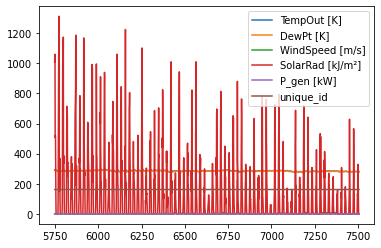

In [42]:
glb.groupby('unique_id').plot()

<AxesSubplot:>

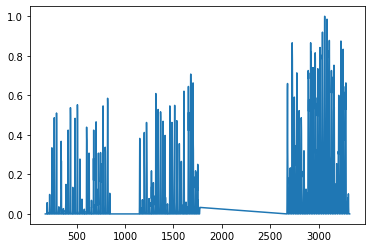

In [43]:
dfs[1].iloc[:,-2].plot()

<AxesSubplot:>

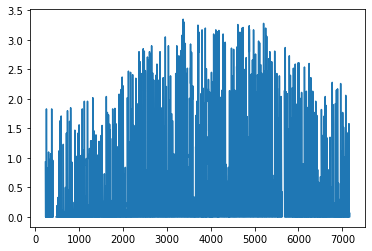

In [44]:
pd.read_csv(files[1], delimiter=';').iloc[:,-1].plot()